<a href="https://colab.research.google.com/github/fbghkh1999/predict_electricity-price/blob/main/Ai_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
%matplotlib inline

In [2]:
testData=pd.read_excel('Test Set.xlsx')
testData.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN


In [3]:
trainData=pd.read_excel('Training Set.xlsx')
trainData.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


In [4]:
trainData.describe()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,12.500000,4.000000,4.572785,2429.484570,2327.516847,1587.817563,0.017128,2433.184528,2426.827399,2464.853534,2442.328138,2429.366103
std,6.922643,1.996965,1.390982,1590.715120,1419.109180,213.112880,73.092988,1125.325853,1564.734896,1605.184755,870.873043,1590.750740
min,1.000000,1.000000,1.000000,124.160000,87.380000,1079.800000,-465.200000,1145.512917,124.160000,124.160000,1409.440833,124.160000
25%,6.750000,2.000000,4.000000,1664.395000,1651.850000,1400.975000,-50.425000,1722.828854,1666.838500,1676.697500,1813.919442,1664.347500
50%,12.500000,4.000000,5.000000,1945.810000,1922.320000,1583.300000,-16.200000,2029.105417,1951.465000,1967.165000,2060.332396,1945.700000
75%,18.250000,6.000000,5.000000,2568.547500,2507.287500,1757.625000,43.300000,2725.680729,2595.940000,2603.567500,2823.226385,2568.547500
max,24.000000,7.000000,8.000000,10117.855409,9548.439791,2192.300000,661.200000,7691.478347,10117.855409,10117.855409,5520.089733,10117.855409


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7584 non-null   datetime64[ns]
 1   Hour                 7584 non-null   int64         
 2   Weekday              7584 non-null   int64         
 3   Is Working Day       7584 non-null   int64         
 4   Previous Hour Price  7584 non-null   float64       
 5   SDSH DAP             7584 non-null   float64       
 6   SDSH Volume          7584 non-null   float64       
 7   Sgn0 VolumeDir       7584 non-null   float64       
 8   P24HA Price          7584 non-null   float64       
 9   PDSH Price           7584 non-null   float64       
 10  PWSH Price           7584 non-null   float64       
 11  PWA Price            7584 non-null   float64       
 12  target               7584 non-null   float64       
dtypes: datetime64[ns](1), float64(9),

In [6]:
testData.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN


In [7]:
len(testData.columns)

13

In [8]:
testData.iloc[:,:12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 96 non-null     datetime64[ns]
 1   Hour                 96 non-null     int64         
 2   Weekday              96 non-null     int64         
 3   Is Working Day       96 non-null     int64         
 4   Previous Hour Price  96 non-null     float64       
 5   SDSH DAP             96 non-null     float64       
 6   SDSH Volume          96 non-null     float64       
 7   Sgn0 VolumeDir       96 non-null     float64       
 8   P24HA Price          96 non-null     float64       
 9   PDSH Price           96 non-null     float64       
 10  PWSH Price           96 non-null     float64       
 11  PWA Price            96 non-null     float64       
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 9.1 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


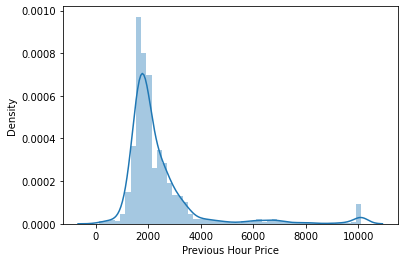

In [9]:
sns.distplot(trainData['Previous Hour Price'])

In [10]:
trainData.isnull().sum()

Date                   0
Hour                   0
Weekday                0
Is Working Day         0
Previous Hour Price    0
SDSH DAP               0
SDSH Volume            0
Sgn0 VolumeDir         0
P24HA Price            0
PDSH Price             0
PWSH Price             0
PWA Price              0
target                 0
dtype: int64

In [11]:
trainData.corr()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
Hour,1.000000e+00,0.000000,5.011445e-18,0.192124,0.192409,0.517051,-0.212302,-0.001876,0.182039,0.179475,-0.000888,0.177124
Weekday,0.000000e+00,1.000000,-3.896767e-01,0.026842,0.021966,0.098590,0.000328,0.082395,0.042976,0.037496,0.003194,0.028230
Is Working Day,5.011445e-18,-0.389677,1.000000e+00,0.056535,0.065865,0.153823,0.008668,0.012707,0.051176,0.033583,-0.021212,0.058574
Previous Hour Price,1.921239e-01,0.026842,5.653474e-02,1.000000,0.783575,0.402524,-0.153837,0.661731,0.496932,0.231000,0.443895,0.842477
SDSH DAP,1.924093e-01,0.021966,6.586538e-02,0.783575,1.000000,0.449537,0.017135,0.604430,0.521162,0.242012,0.407088,0.877215
SDSH Volume,5.170506e-01,0.098590,1.538228e-01,0.402524,0.449537,1.000000,0.171447,0.234202,0.439201,0.378483,0.191661,0.455266
Sgn0 VolumeDir,-2.123017e-01,0.000328,8.667760e-03,-0.153837,0.017135,0.171447,1.000000,-0.007565,0.021994,0.017315,-0.002684,0.025239
P24HA Price,-1.875810e-03,0.082395,1.270705e-02,0.661731,0.604430,0.234202,-0.007565,1.000000,0.496881,0.191215,0.687520,0.640644
PDSH Price,1.820387e-01,0.042976,5.117556e-02,0.496932,0.521162,0.439201,0.021994,0.496881,1.000000,0.538969,0.496169,0.545640
PWSH Price,1.794747e-01,0.037496,3.358272e-02,0.231000,0.242012,0.378483,0.017315,0.191215,0.538969,1.000000,0.434290,0.261182


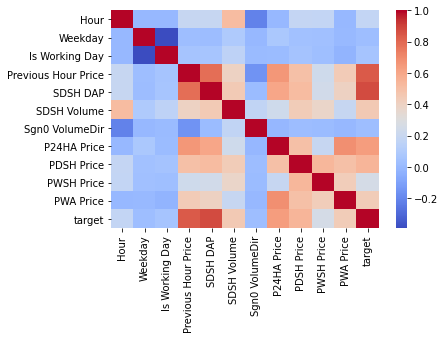

In [12]:
sns.heatmap(trainData.corr(),cmap='coolwarm')

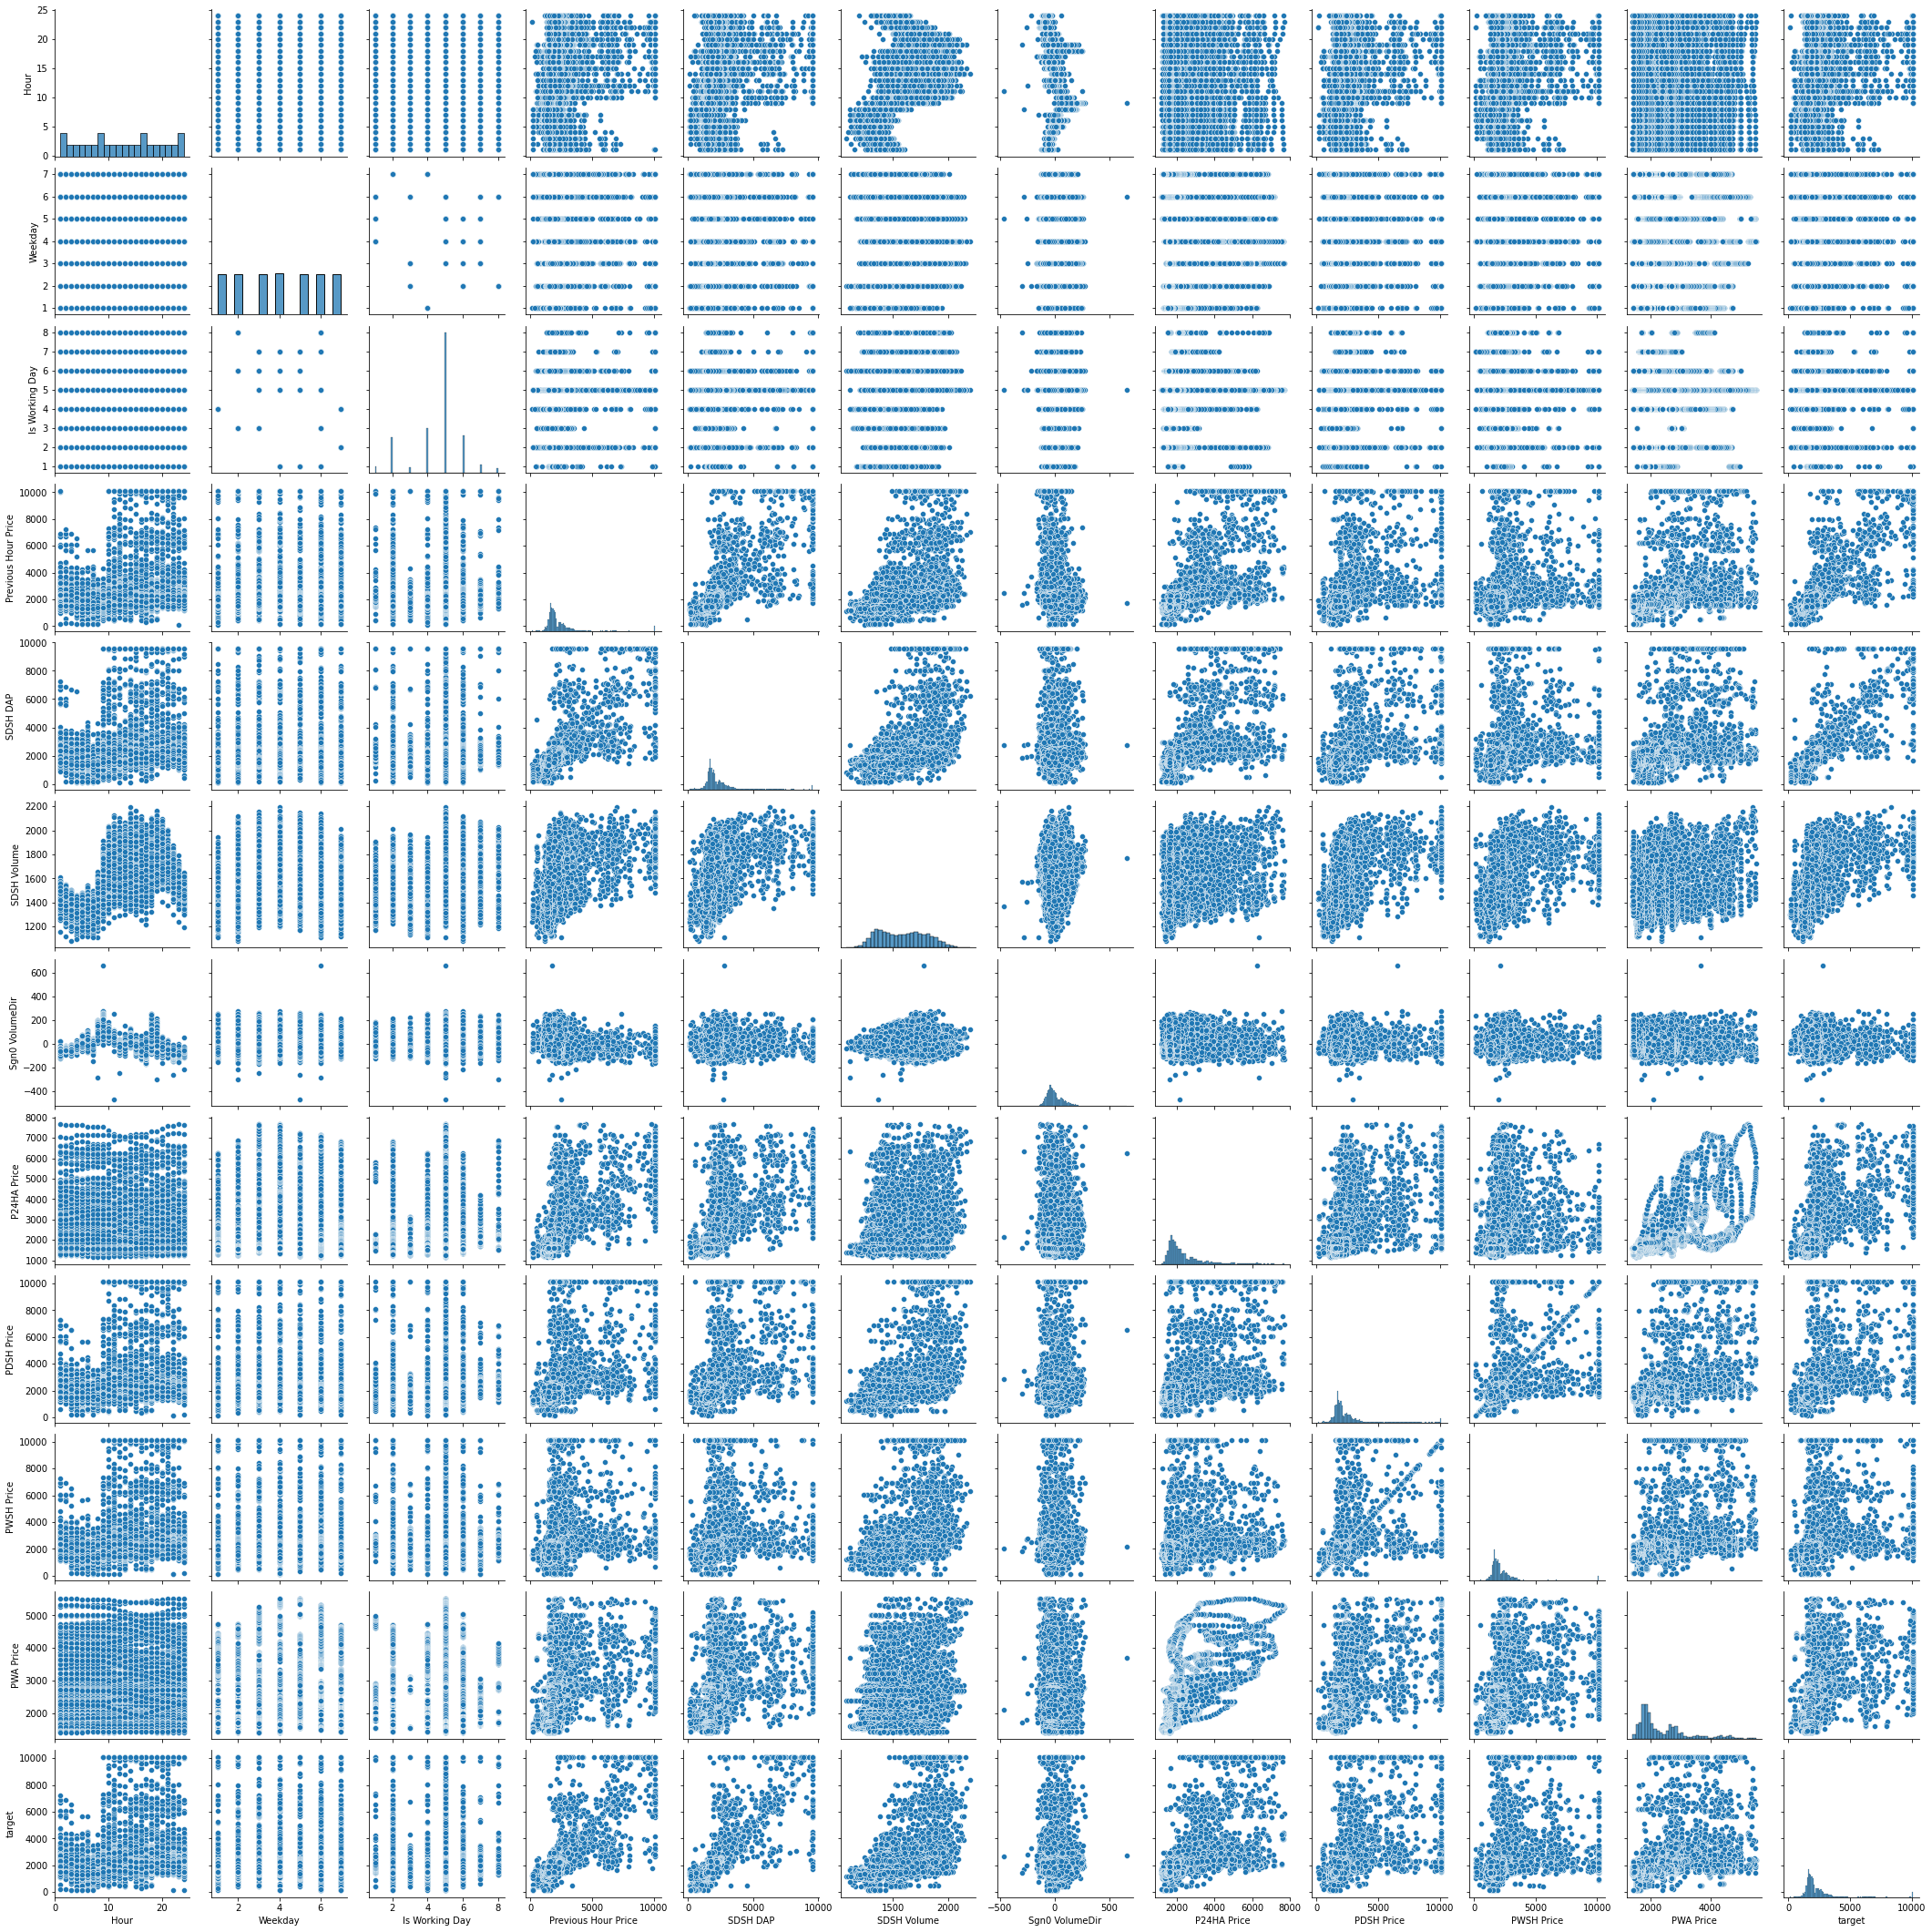

In [13]:
sns.pairplot(trainData)

In [14]:
trainData.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7579    False
7580    False
7581    False
7582    False
7583    False
Length: 7584, dtype: bool

In [15]:
trainData[trainData.duplicated()]

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target


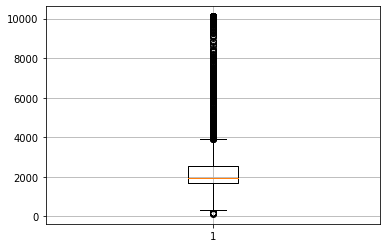

In [16]:
# find outliers
plt.grid()
plt.boxplot(trainData.iloc[:,4])
plt.show()

In [17]:
from sklearn.feature_selection import VarianceThreshold
s=VarianceThreshold(threshold=(.8 * (1 - .8)))
x=s.fit_transform(trainData.iloc[:,4:12])
testData=s.fit_transform(testData.iloc[:,4:12])

In [18]:
y=trainData.target
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)
# x_test=testData.iloc[:,:12]
x

array([[2400.41      , 2479.45      , 1383.7       , ..., 2473.        ,
        1837.47      , 2296.05952381],
       [2475.68      , 2494.        , 1339.3       , ..., 2459.38      ,
        1434.83      , 2299.85839286],
       [2484.4       , 2474.85      , 1309.4       , ..., 2370.61      ,
        1498.33      , 2306.10583333],
       ...,
       [1463.07      , 1772.66      , 1759.8       , ..., 1922.86      ,
        1368.03      , 1444.07744048],
       [1937.        , 1700.5       , 1668.2       , ..., 1719.45      ,
        1335.67      , 1447.46416667],
       [1924.55      , 1507.32      , 1614.3       , ..., 1503.84      ,
         183.26      , 1450.96940476]])

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X_train=sc.fit_transform(X_train[:,4:12])
x_test=sc.fit_transform(x_test[:,4:12])
testData=sc.fit_transform(testData[:,4:12])


In [20]:
Y_train1=sc.fit_transform(pd.DataFrame(Y_train))


In [36]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=42,n_estimators=10000)
regr.fit(X_train, Y_train1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [37]:
pred_y=regr.predict(x_test)
pred_y=pred_y.reshape(-1,1)
pred_y_new=sc.inverse_transform(pred_y)

pred_ydata=regr.predict(testData)
pred_ydata=pred_y.reshape(-1,1)
pred_y_newdata=sc.inverse_transform(pred_ydata)

In [38]:
len(pred_y_new)

2276

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,pred_y_new)

0.5428276083419548

In [25]:
model = Sequential()
model.add(Dense(5308,kernel_initializer='he_uniform', input_dim=4))
model.compile(loss='mse', optimizer='sgd')

In [26]:
print('Training -----------')
for step in range(500):
    cost = model.train_on_batch(X_train, Y_train1)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  0.24289502203464508
train cost:  0.24273407459259033
train cost:  0.24257339537143707
train cost:  0.24241280555725098
train cost:  0.2422524392604828


In [27]:
print('\nTesting ------------')
cost = model.evaluate(x_test, y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)



Testing ------------
57/57 [==============================] - 0s 2ms/step - loss: 8440285.0000
test cost: 8440285.0
Weights= [[ 0.06583408 -0.2437914  -0.20332813 ...  0.09041893 -0.37671214
   0.77155554]
 [-0.41382253  1.2234846  -0.19282848 ...  0.16541654  0.11763853
   0.46081567]
 [ 0.9426621   1.1742128  -0.1740244  ...  1.1738197  -0.01009525
  -0.4777373 ]
 [ 0.65791416  0.9998585   0.33789802 ...  0.34641647 -0.866555
  -0.34108043]] 
biases= [-0.00014138 -0.00100662  0.00051048 ... -0.00035831  0.00093733
  0.0003227 ]


In [28]:
Y_pred = model.predict(testData)

Y_pred_new=sc.inverse_transform(Y_pred)
Y_pred_new

array([[ -517.7603 ,  7471.6665 , -3022.9714 , ...,  3645.4226 ,
        -2277.1335 ,  8709.552  ],
       [ 1183.7483 ,  9468.302  , -3110.965  , ...,  5492.8096 ,
        -2628.343  ,  7767.074  ],
       [ 1626.606  ,  9089.725  , -2941.7285 , ...,  5562.409  ,
        -2875.593  ,  7391.0244 ],
       ...,
       [ 7593.389  , 21336.29   ,   750.17236, ...,  9673.695  ,
        -6789.194  , -1414.438  ],
       [ 7613.7144 , 21499.023  ,   734.83154, ...,  9747.07   ,
        -6767.8677 , -1437.3268 ],
       [ 7520.567  , 21341.291  ,   790.02734, ...,  9618.411  ,
        -6597.0825 , -1641.3207 ]], dtype=float32)

In [29]:
import numpy as np
import pandas as pd

# Prepare data

data_df = pd.DataFrame(Y_pred_new)   
 
# Write the file into the excel table
writer = pd.ExcelWriter('Y_pred_new.xlsx') 
data_df.to_excel(writer,'page_1')  
writer.save()  #Key 4


In [40]:
data_df1= pd.DataFrame(pred_y_newdata)
writer = pd.ExcelWriter('pred_y_newdata.xlsx') 
data_df1.to_excel(writer,'page_1') 
writer.save()